# Lab 2 - Kamil Pieprzycki 402037

In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats 
import seaborn as sns

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Excercise 1 - generated quantities


INFO:cmdstanpy:compiling stan file /home/lab2/code_1.stan to exe file /home/lab2/code_1
INFO:cmdstanpy:compiled model executable: /home/lab2/code_1
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/lab2/code_1.hpp /home/lab2/code_1.stan
Warning in '/home/lab2/code_1.stan', line 8, column 3: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundials_6.0.0/include -I stan/lib/stan_math/lib/sundials_6.0.0/src/sundials    -DBOOST_D


INFO:cmdstanpy:CmdStan done processing.


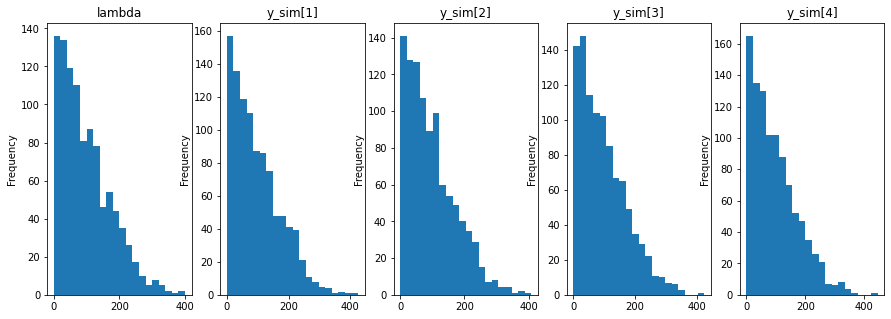

In [2]:

F = len('Kamil')



gen_quant = CmdStanModel(stan_file='code_1.stan')

samples = gen_quant.sample(data={'M':F},
fixed_param=True,
iter_sampling=1000,
iter_warmup=0,
chains = 1)

df = samples.draws_pd()


Lambda = df['lambda']
fig, ax = plt.subplots(1, 5, figsize=(15,5))
bins = 20
df["lambda"].plot.hist(bins=bins, ax=ax[0])
ax[0].set_title("lambda")
for i in range(1,5):
    df[f"y_sim[{i}]"].plot.hist(bins=bins, ax=ax[i])
    ax[i].set_title(f"y_sim[{i}]")
    


## Excercise 2 - Constraints on the data


In [3]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})

bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})



INFO:cmdstanpy:compiling stan file /home/lab2/code_2.stan to exe file /home/lab2/code_2
INFO:cmdstanpy:compiled model executable: /home/lab2/code_2
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/lab2/code_2.hpp /home/lab2/code_2.stan
Warning in '/home/lab2/code_2.stan', line 3, column 4: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundials_6.0.0/include -I stan/lib/stan_math/lib/sundials_6.0.0/src/sundials    -DBOOST_D


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:compiling stan file /home/lab2/code_3.stan to exe file /home/lab2/code_3


INFO:cmdstanpy:compiled model executable: /home/lab2/code_3
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/lab2/code_3.hpp /home/lab2/code_3.stan
Warning in '/home/lab2/code_3.stan', line 3, column 4: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundials_6.0.0/include -I stan/lib/stan_math/lib/sundials_6.0.0/src/sundials    -DBOOST_DISABLE_ASSERTS          -c -Wno-ignored-attributes   -x c++ -o /home/lab2/code_3.o /home


INFO:cmdstanpy:CmdStan done processing.


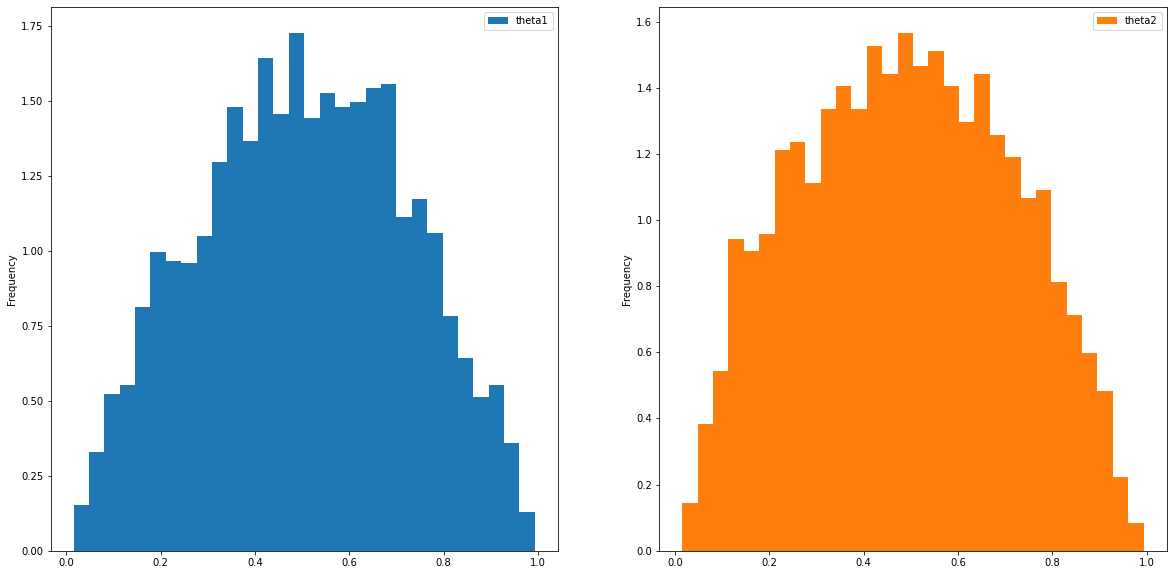

In [4]:
theta1 = samp_bern1.stan_variable("theta")
theta2 = samp_bern2.stan_variable("theta")
df = pd.DataFrame({'theta1': theta1, 'theta2': theta2})
df.plot.hist(subplots=True, bins=30, figsize=(20, 10), layout=(1, 2), density=True)
plt.show()

## Excercise 3 - constraints on the parameters

In [5]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()


INFO:cmdstanpy:compiling stan file /home/lab2/code_4.stan to exe file /home/lab2/code_4
INFO:cmdstanpy:compiled model executable: /home/lab2/code_4
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▏         | 00:00 Status


chain 1 |█▊        | 00:00 Iteration: 1001 / 7000 [ 14%]  (Sampling)




chain 1 |██▉       | 00:00 Iteration: 1800 / 7000 [ 25%]  (Sampling)


chain 1 |███▌      | 00:01 Iteration: 2300 / 7000 [ 32%]  (Sampling)




chain 1 |████▏     | 00:01 Iteration: 2700 / 7000 [ 38%]  (Sampling)


chain 1 |████▌     | 00:01 Iteration: 3000 / 7000 [ 42%]  (Sampling)




chain 1 |█████     | 00:01 Iteration: 3300 / 7000 [ 47%]  (Sampling)


chain 1 |█████▎    | 00:01 Iteration: 3500 / 7000 [ 50%]  (Sampling)


chain 1 |█████▌    | 00:02 Iteration: 3700 / 7000 [ 52%]  (Sampling)


chain 1 |█████▊    | 00:02 Iteration: 3900 / 7000 [ 55%]  (Sampling)


chain 1 |██████    | 00:02 Iteration: 4100 / 7000 [ 58%]  (Sampling)


chain 1 |██████▍   | 00:


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/lab2/samples/code_4-20230330145653_1.csv, /home/lab2/samples/code_4-20230330145653_2.csv, /home/lab2/samples/code_4-20230330145653_3.csv, /home/lab2/samples/code_4-20230330145653_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9489 of 24000 (39.54%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

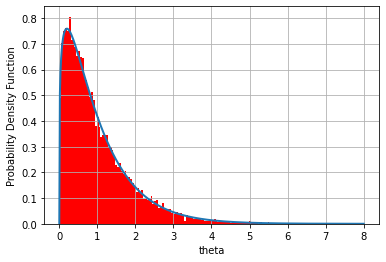

In [6]:

N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs,linewidth=2)

# ## add histogram of theta samples with 160 bins
df = out_gamma1.draws_pd()

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
df["theta"].hist(bins=160, density=True,color='r')
plt.show()

Constrained parameter

In [7]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:compiling stan file /home/lab2/code_5.stan to exe file /home/lab2/code_5
INFO:cmdstanpy:compiled model executable: /home/lab2/code_5
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▏         | 00:00 Status
chain 1 |█▊        | 00:00 Iteration: 1001 / 7000 [ 14%]  (Sampling)




chain 1 |██▉       | 00:00 Iteration: 1800 / 7000 [ 25%]  (Sampling)




chain 1 |███▌      | 00:01 Iteration: 2300 / 7000 [ 32%]  (Sampling)



chain 1 |████▏     | 00:01 Iteration: 2700 / 7000 [ 38%]  (Sampling)




chain 1 |████▌     | 00:01 Iteration: 3000 / 7000 [ 42%]  (Sampling)


chain 1 |█████     | 00:01 Iteration: 3300 / 7000 [ 47%]  (Sampling)


chain 1 |█████▎    | 00:02 Iteration: 3500 / 7000 [ 50%]  (Sampling)


chain 1 |█████▌    | 00:02 Iteration: 3700 / 7000 [ 52%]  (Sampling)


chain 1 |█████▊    | 00:02 Iteration: 3900 / 7000 [ 55%]  (Sampling)


chain 1 |██████    | 00:02 Iteration: 4100 / 7000 [ 58%]  (Sampling)


chain 1 |██████▍   | 00


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/lab2/samples/code_5-20230330145708_1.csv, /home/lab2/samples/code_5-20230330145708_2.csv, /home/lab2/samples/code_5-20230330145708_3.csv, /home/lab2/samples/code_5-20230330145708_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n2 of 24000 (0.01%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

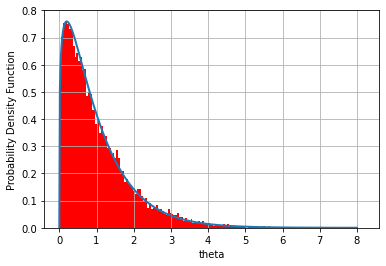

In [8]:


N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples from the second model with 160 bins
df = out_gamma2.draws_pd()

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
df["theta"].hist(bins=160, density=True,color='r')

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")

plt.show()



## Excercise 4 - Selection of parameters using equation solving

In [9]:
model_tune = CmdStanModel(stan_file='code_6.stan')

F = len('Kamil')
L = len('Pieprzycki')
y0 = 0.5

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)
sought_sigma=tunes.draws_pd()["sigma"][0]
print(sought_sigma)

INFO:cmdstanpy:compiling stan file /home/lab2/code_6.stan to exe file /home/lab2/code_6
INFO:cmdstanpy:compiled model executable: /home/lab2/code_6
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/lab2/code_6.hpp /home/lab2/code_6.stan
Warning in '/home/lab2/code_6.stan', line 3, column 46: Declaration of arrays
    by placing brackets after a type is deprecated and will be removed in
    Stan 2.32.0. Instead use the array keyword before the type. This can be
    changed automatically using the auto-format flag to stanc
Warning in '/home/lab2/code_6.stan', line 3, column 58: Declaration of arrays
    by placing brackets after a type is deprecated and will be removed in
    Stan 2.32.0. Instead use the array keyword before the type. This can be
    changed automatically using the auto-format flag to stanc
Warning in '/home/lab2/code_6.stan', line 17, column 3: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
    removed in Stan


INFO:cmdstanpy:CmdStan done processing.



2.91168


## Excercise 5 - different methods of defining models

In [10]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = 60022000 #integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)

INFO:cmdstanpy:compiling stan file /home/lab2/code_7.stan to exe file /home/lab2/code_7
INFO:cmdstanpy:compiled model executable: /home/lab2/code_7
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/lab2/code_7.hpp /home/lab2/code_7.stan
Warning in '/home/lab2/code_7.stan', line 6, column 4: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundials_6.0.0/include -I stan/lib/stan_math/lib/sundials_6.0.0/src/sundials    -DBOOST_D

INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


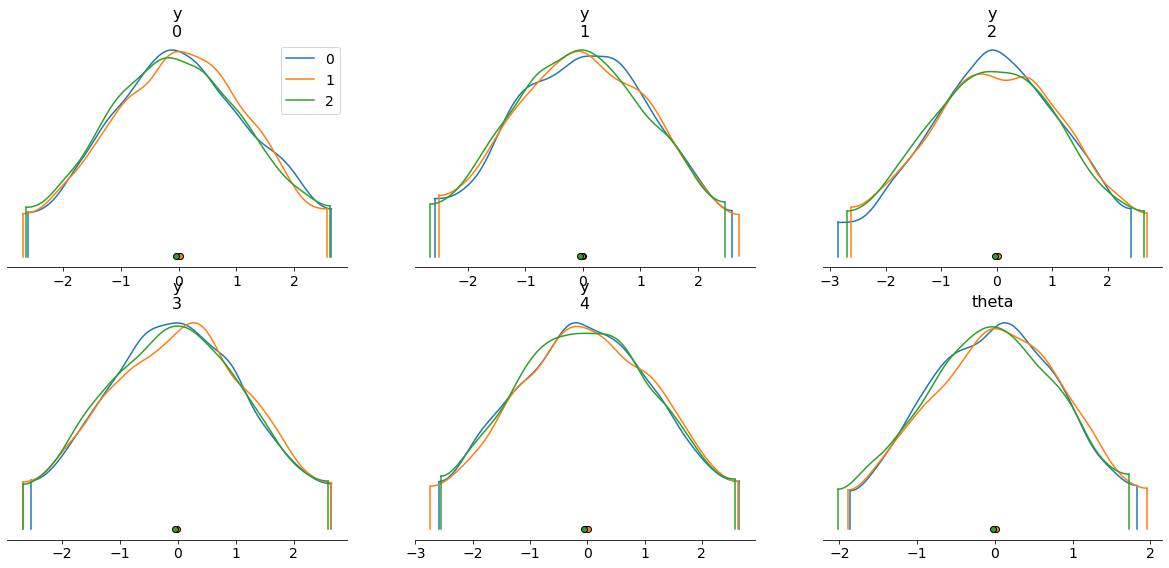

In [11]:
az.plot_density([result_1,result_2,result_3])
plt.show()


## Excercise 6 - generated quantities post sampling

In [12]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_1)
# investigate the output and plot histogram of mean_y variable

df = mean_of_y.draws_pd()

INFO:cmdstanpy:compiling stan file /home/lab2/code_10.stan to exe file /home/lab2/code_10
INFO:cmdstanpy:compiled model executable: /home/lab2/code_10
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/lab2/code_10.hpp /home/lab2/code_10.stan
Warning in '/home/lab2/code_10.stan', line 6, column 4: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundials_6.0.0/include -I stan/lib/stan_math/lib/sundials_6.0.0/src/sundials    -DB

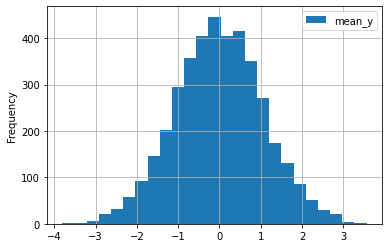

In [13]:
df.plot.hist(bins=25)
plt.grid()